In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
%matplotlib inline


In [82]:
#En resumen de la actividad anterior tenemos
url1 = "https://raw.githubusercontent.com/HumbertoMezaRuiz/FisicaComputacional1/main/Actividad5/26329.txt"#Definimos este link para usar el texo desde ahi

encabezado = ['Fecha','Precipit','Evap','Tmax','Tmin']#Definimos aqui los encabezados para tener mas orden al definir el df

#Ahora definimos nuestro df, donde como archivo pondremos el link url1 y en names, los encabezado definidos previamente
df_dist = pd.read_csv(url1, names=encabezado, encoding='cp1251', sep='\s+', skiprows=19, skipfooter=2, header=None, engine='python')

df_work0 = df_dist.copy()     #Hacemos una copia de nuestros datos para manipularlos sin miedo a perderlos

str_Nulo = 'Nulo'    #Aqui pondremos lo que querramos quitar, es decir, en mis datos hay datos que dicen 'nulos'

df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)        #Reemplazamos todos los nulos, en este caso, quedara en blanco

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precipit', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

df_work2 = df_work1.copy() #hacemos otra copia para hacer otro cambio

df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy() #Le decimos a python que esa columna son fehcas y le decimos que el primer numero son los dias

df_work2['Año'] = df_work2['Fecha'].dt.year  #Vamos a crear una columna con el año de las fechas

df_work2['Mes'] = df_work2['Fecha'].dt.month #y otras con el mes
 
############################################################################################################################################
df_meteo = df_work2.copy()# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos.
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     10716 non-null  datetime64[ns]
 1   Precipit  10715 non-null  float64       
 2   Evap      1706 non-null   float64       
 3   Tmax      10624 non-null  float64       
 4   Tmin      10626 non-null  float64       
 5   Año       10716 non-null  int64         
 6   Mes       10716 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 586.2 KB
       Fecha  Precipit  Evap  Tmax  Tmin   Año  Mes
0 1984-01-01       0.0   3.2  32.0   9.0  1984    1
1 1984-01-02       0.0   3.7  26.0  10.0  1984    1
2 1984-01-03       6.0   1.7  26.0  10.0  1984    1
3 1984-01-04      22.0   1.0  24.0  11.0  1984    1
4 1984-01-05       0.0   1.0  23.0  11.0  1984    1
           Fecha  Precipit  Evap  Tmax  Tmin   Año  Mes
10711 2016-03-26       0.0   NaN  30.0 

In [83]:
df_meteo_ts = df_meteo.copy() # Hacemos una copia para darle sin miedo

df_meteo_ts = df_meteo_ts.set_index('Fecha') # Con esto hacemos que en vez de enumerar las filas, sale directamente por fecha

df_meteo_ts.info()
print(df_meteo_ts.head())
print(df_meteo_ts.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10716 entries, 1984-01-01 to 2016-03-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Precipit  10715 non-null  float64
 1   Evap      1706 non-null   float64
 2   Tmax      10624 non-null  float64
 3   Tmin      10626 non-null  float64
 4   Año       10716 non-null  int64  
 5   Mes       10716 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 586.0 KB
            Precipit  Evap  Tmax  Tmin   Año  Mes
Fecha                                            
1984-01-01       0.0   3.2  32.0   9.0  1984    1
1984-01-02       0.0   3.7  26.0  10.0  1984    1
1984-01-03       6.0   1.7  26.0  10.0  1984    1
1984-01-04      22.0   1.0  24.0  11.0  1984    1
1984-01-05       0.0   1.0  23.0  11.0  1984    1
            Precipit  Evap  Tmax  Tmin   Año  Mes
Fecha                                            
2016-03-26       0.0   NaN  30.0  11.0  2016    3
2016-03-27 

**Actividad 1.** Explora tus datos de Precipitación los últimos años 1990- fin de datos.

*   Grafica todo el rango de datos utilizando la función df.plot()
*   Analiza un año específico completo, utiliza la función df.loc() para seleccionar el rango de datos.
*   Grafica la estacionalidad de tus datos por mes utilizando la función sns.barplot() 

In [84]:
# Vamos a utilizar los últimos 30 años de datos, que corresponden al periodo 1986-2016
df_30años = df_meteo_ts[(df_meteo_ts['Año'] >= 1990) & (df_meteo_ts['Año'] < 2017)]
df_30años.head()

,Precipit,Evap,Tmax,Tmin,Año,Mes
Fecha,,,,,,
1990-01-01,0.0,NaN,25.0,-1.0,1990,1
1990-01-02,0.0,NaN,24.0,0.0,1990,1
1990-01-03,0.0,NaN,22.0,-1.0,1990,1
1990-01-04,0.0,NaN,19.0,-1.0,1990,1
1990-01-05,0.0,NaN,21.0,-2.0,1990,1


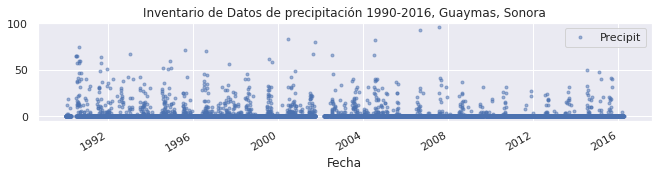

In [85]:
# Checamos la continuidad de datos, para ver si será viable usar ese periodo
cols_plot = ['Precipit']
ax_ylabels = ['Precip (mm)']
axes = df_30años[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 2), subplots=True)
plt.title('Inventario de Datos de precipitación 1990-2016, Guaymas, Sonora');

Text(0.5, 1.0, 'Precipitación 1990-2016, Guaymas, Sonora')

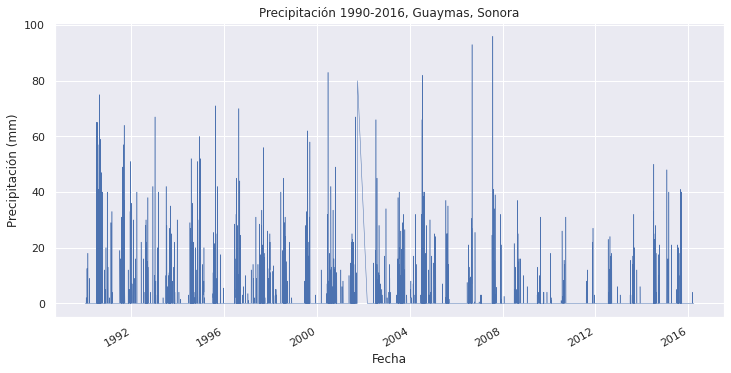

In [86]:
# Gráfica de los 30 años de precipitación
sns.set(rc={'figure.figsize':(12, 6)})
df_30años['Precipit'].plot(linewidth=0.5);
plt.ylabel('Precipitación (mm)');
plt.title('Precipitación 1990-2016, Guaymas, Sonora')

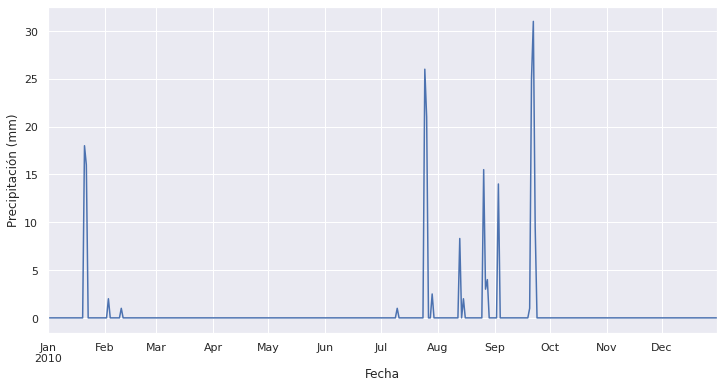

In [87]:
# Analizando la precipitación en el año 2010, usando la función df.loc() para filtrar un periodo
sns.set(rc={'figure.figsize':(12, 6)})
ax = df_30años.loc['2010', 'Precipit'].plot()
ax.set_ylabel('Precipitación (mm)');

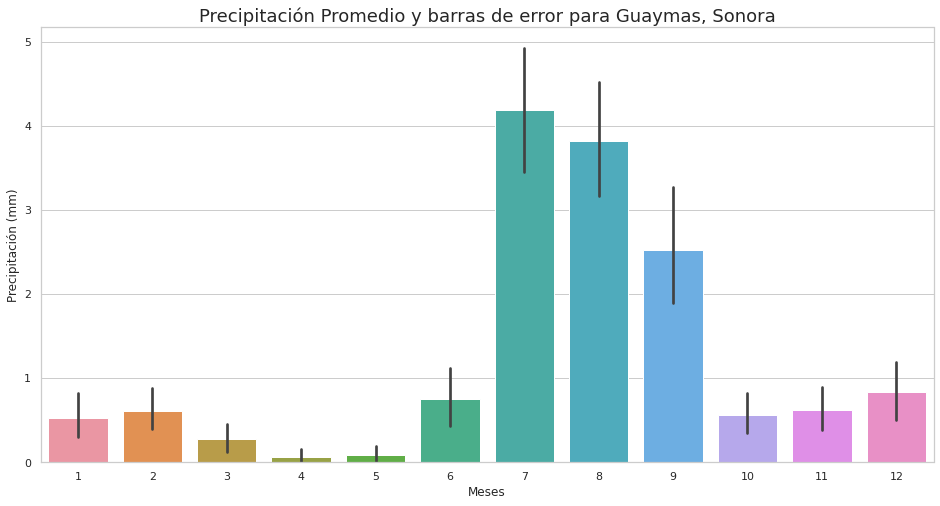

In [88]:
# Gráfica de Precipitación últimos 30 años agrupada por mes
sns.set_style('whitegrid')

# Para poner la gráfica más grande
plt.figure(figsize=(16,8))

# la gráfica
g =sns.barplot(x='Mes', y='Precipit', data=df_30años);

#Etiquetas
plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Guaymas, Sonora', fontsize=18)

plt.show()

**Actividad 2.** Explora tus datos de Temperaturas Máxima y Mínima de los últimos 30 años datos a partir de 1990.  Trata de construir dos subgráficas contiguas. 

* Grafica todo el rango de datos utilizando la función df.plot(), incluye una línea punteada mostrando el promedio. 
* Analiza un año específico completo para las dos Temperaturas, con apoyo de la función df.loc() 
* Grafica la estacionalidad filtrando tus datos por mes y utilizando la función sns.boxplot(), incluye una línea punteada mostrando el promedio.  

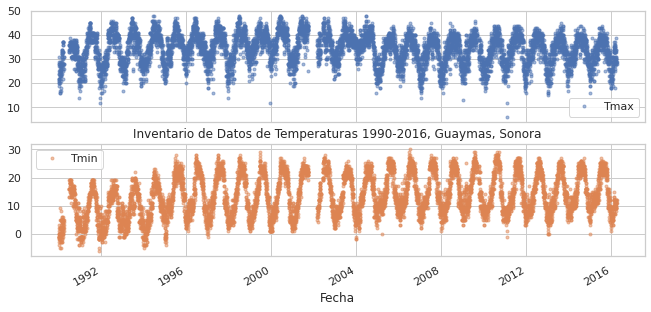

In [89]:
# Checamos la continuidad de datos, para ver si será viable usar ese periodo
cols_plot = ['Tmax', 'Tmin']
ax_ylabels = ['Temperatura Máxima (°C)', 'Temperatura Mínima (°C)']
axes = df_30años[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 5), subplots=True)
plt.title('Inventario de Datos de Temperaturas 1990-2016, Guaymas, Sonora');

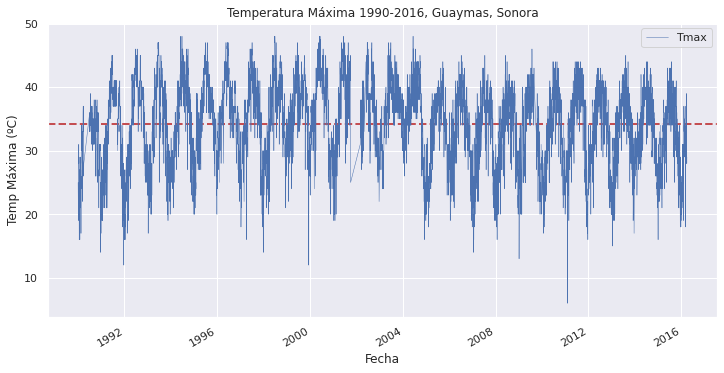

In [90]:
# Gráfica de la temperatura máxima en los 30 años
sns.set(rc={'figure.figsize':(12, 6)})

# Cálculo de promedio
Tmax_ave = df_30años.Tmax.mean()
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);

df_30años['Tmax'].plot(linewidth=0.5);
plt.ylabel('Temp Máxima (ºC)');
plt.title('Temperatura Máxima 1990-2016, Guaymas, Sonora')

plt.legend();

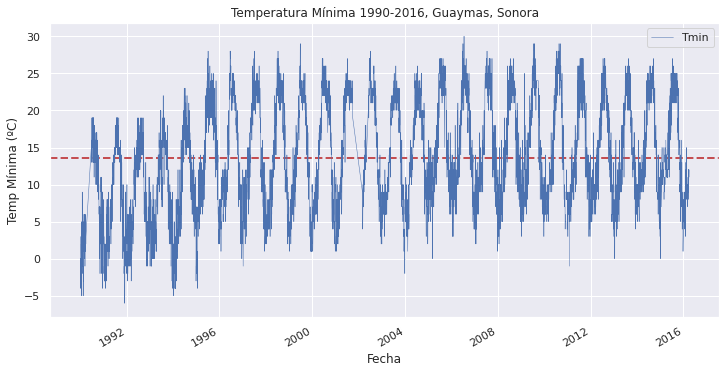

In [91]:
# Gráfica de la temperatura mínima en los 30 años
sns.set(rc={'figure.figsize':(12, 6)})

# Cálculo de promedio
Tmin_ave = df_30años.Tmin.mean()
plt.axhline(Tmin_ave, color = 'r', linestyle='--', linewidth=2);

df_30años['Tmin'].plot(linewidth=0.5);
plt.ylabel('Temp Mínima (ºC)');
plt.title('Temperatura Mínima 1990-2016, Guaymas, Sonora')

plt.legend();

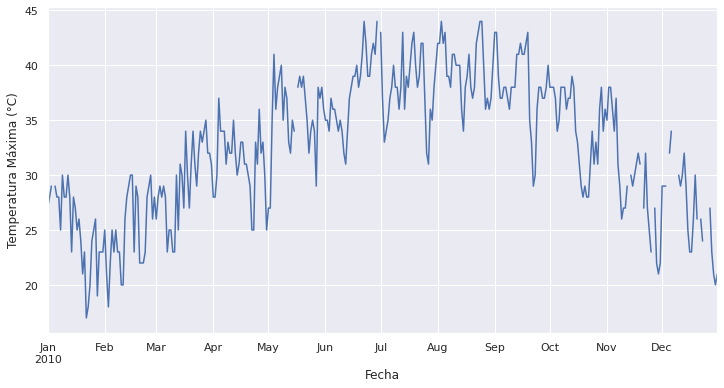

In [92]:
# Analizando la temp maxima en el año 2010, usando la función df.loc() para filtrar un periodo
sns.set(rc={'figure.figsize':(12, 6)})
ax = df_30años.loc['2010', 'Tmax'].plot()
ax.set_ylabel('Temperatura Máxima (°C)');

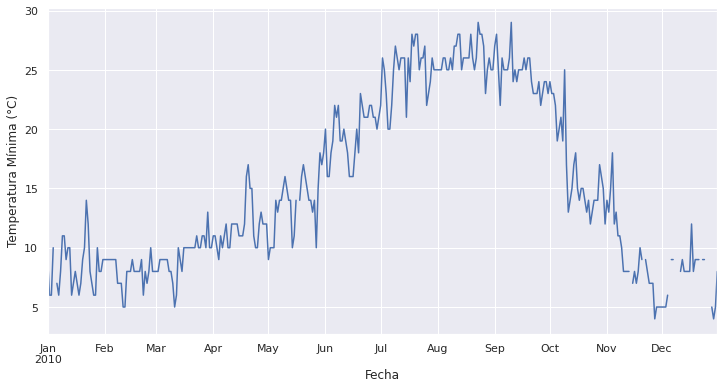

In [93]:
# Analizando la temp minima en el año 2010, usando la función df.loc() para filtrar un periodo
sns.set(rc={'figure.figsize':(12, 6)})
ax = df_30años.loc['2010', 'Tmin'].plot()
ax.set_ylabel('Temperatura Mínima (°C)');

Text(0.5, 1.0, 'Tmax')

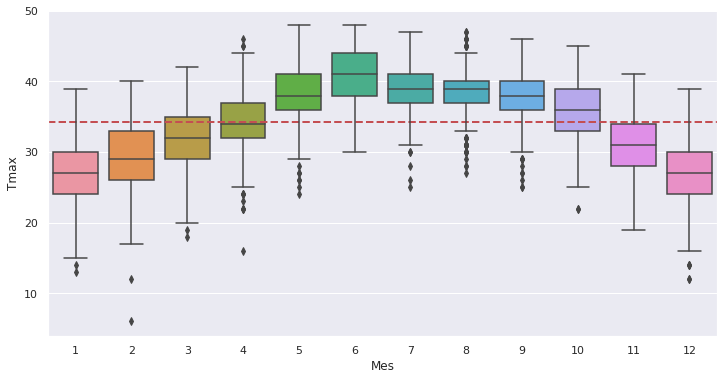

In [94]:
# Analizando Estacionalidad de los datos de Tmax

Tmax_ave = df_30años.Tmax.mean()

plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);

sns.boxplot(data=df_30años, x='Mes', y='Tmax')
  
  
ax.set_title('Tmax')


Text(0.5, 1.0, 'Tmin')

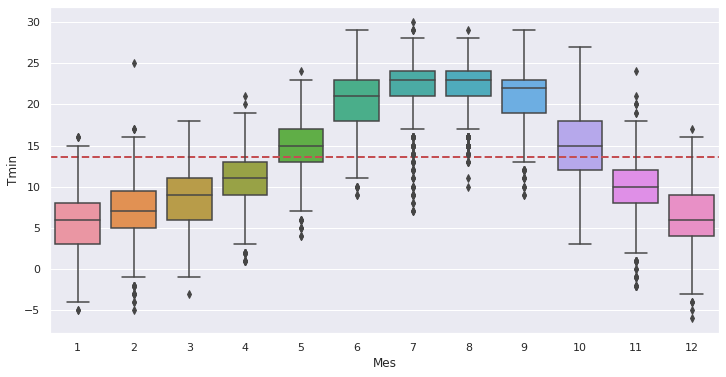

In [95]:
# Analizando Estacionalidad de los datos de Tmin

Tmin_ave = df_30años.Tmin.mean()

plt.axhline(Tmin_ave, color = 'r', linestyle='--', linewidth=2);

sns.boxplot(data=df_30años, x='Mes', y='Tmin')
  
  
ax.set_title('Tmin')

**Actividad 3.** Realiza el mismo análisis que en la **Actividad 2**, pero para la variable de Evaporación.

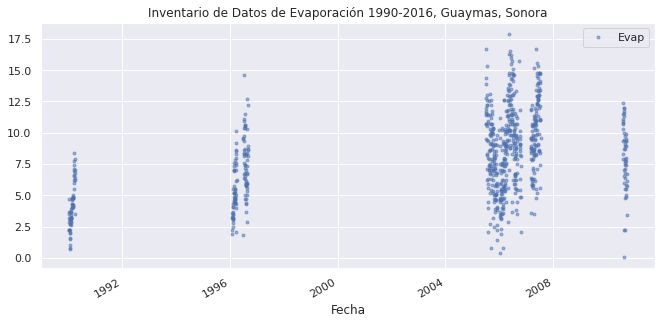

In [96]:
# Checamos la continuidad de datos, para ver si será viable usar ese periodo
cols_plot = ['Evap']
ax_ylabels = ['Evaporación (mm)']
axes = df_30años[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 5), subplots=True)
plt.title('Inventario de Datos de Evaporación 1990-2016, Guaymas, Sonora');

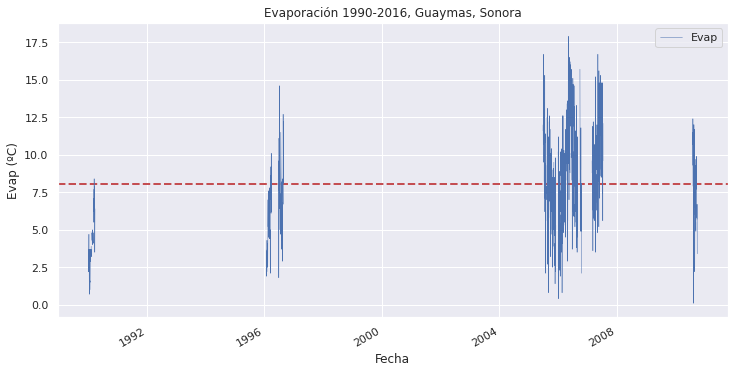

In [97]:
# Gráfica de la temperatura máxima en los 30 años
sns.set(rc={'figure.figsize':(12, 6)})

# Cálculo de promedio
Evap_ave = df_30años.Evap.mean()
plt.axhline(Evap_ave, color = 'r', linestyle='--', linewidth=2);

df_30años['Evap'].plot(linewidth=0.5);
plt.ylabel('Evap (ºC)');
plt.title('Evaporación 1990-2016, Guaymas, Sonora')

plt.legend();

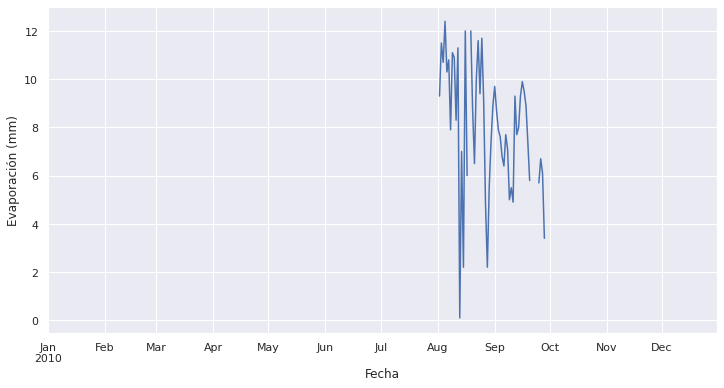

In [98]:
# Analizando la evaporación en el año 2010, usando la función df.loc() para filtrar un periodo
sns.set(rc={'figure.figsize':(12, 6)})
ax = df_30años.loc['2010', 'Evap'].plot()
ax.set_ylabel('Evaporación (mm)');

Text(0.5, 1.0, 'Evap')

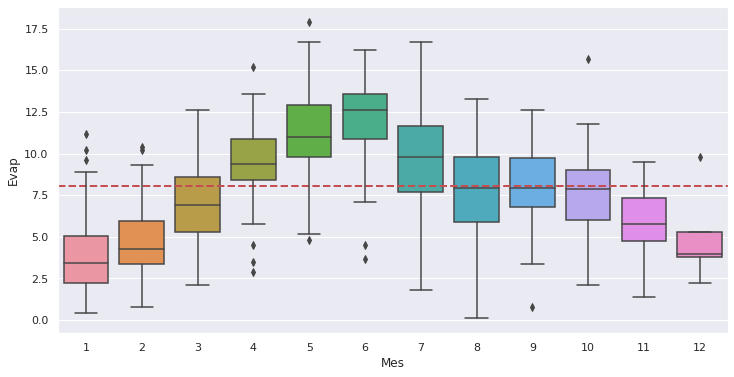

In [99]:
# Analizando Estacionalidad de los datos de Evap

Evap_ave = df_30años.Evap.mean()

plt.axhline(Evap_ave, color = 'r', linestyle='--', linewidth=2);

sns.boxplot(data=df_30años, x='Mes', y='Evap')
  
  
ax.set_title('Evap')

**Actividad 4.**  Crea nuevos DataFrames de las Temperaturas y la Evaporación con promedios móviles de 7, 30 y 365 días, utilizando la función df.rolling(). Explora tus datos:

* Para un año de datos, contrastando los datos diarios con el promedio móvil de 7 y 30 días. 
* Explora para 10 o más años de datos, contrastando los datos diarios con las gráficas de promedio móvil de 365 días.

In [100]:
# Suavizando la curva de Tmax, utilizando Promedios Móviles (7,30 y 365 días)
data_cols = ['Evap', 'Tmax', 'Tmin']
df_30años_7d = df_30años[data_cols].rolling(7, center=True).mean()
df_30años_30d = df_30años[data_cols].rolling(30, center=True).mean()
df_30años_365d = df_30años[data_cols].rolling(365, center=True).mean()

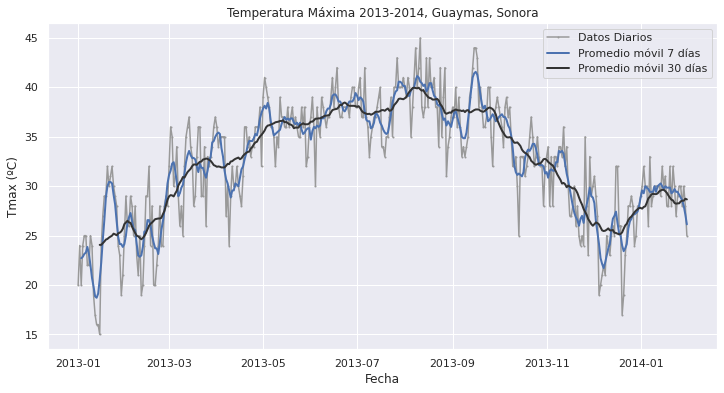

In [101]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2013-01', '2014-01'

# Contraste de la gráfica de datos diarios y promedio móvil de 7 y 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_30años.loc[start:end, 'Tmax'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_30años_7d.loc[start:end, 'Tmax'], linestyle='-', linewidth=2, label='Promedio móvil 7 días')
ax.plot(df_30años_30d.loc[start:end, 'Tmax'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2013-2014, Guaymas, Sonora')
ax.legend();

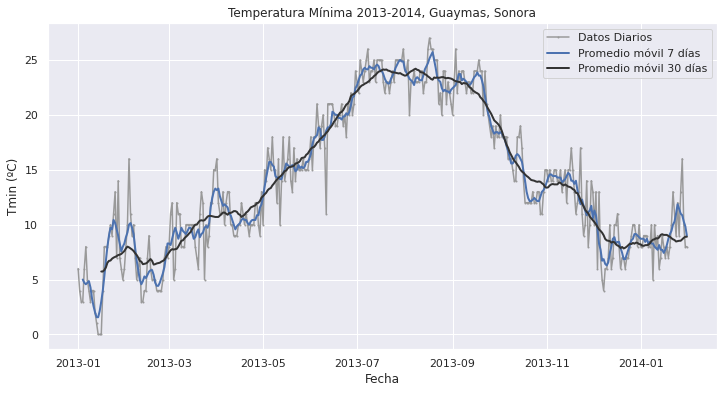

In [102]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2013-01', '2014-01'

# Contraste de la gráfica de datos diarios y promedio móvil de 7 y 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_30años.loc[start:end, 'Tmin'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_30años_7d.loc[start:end, 'Tmin'], linestyle='-', linewidth=2, label='Promedio móvil 7 días')
ax.plot(df_30años_30d.loc[start:end, 'Tmin'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (ºC)')
ax.set_title('Temperatura Mínima 2013-2014, Guaymas, Sonora')
ax.legend();

Para la evaporación no hay datos suficientes para hacer un buen análisis en ningún año

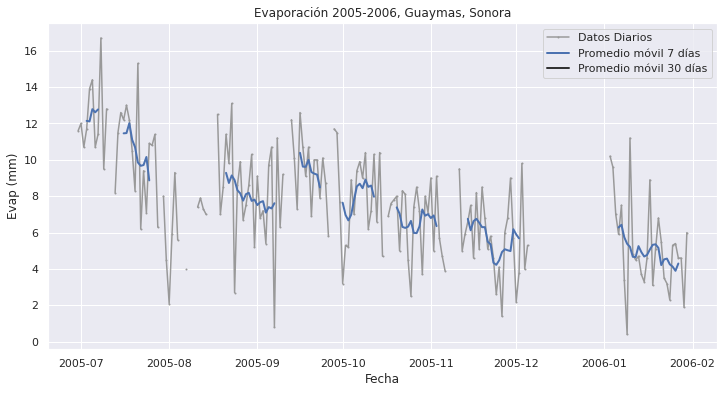

In [103]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2005-01', '2006-01'

# Contraste de la gráfica de datos diarios y promedio móvil de 7 y 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_30años.loc[start:end, 'Evap'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_30años_7d.loc[start:end, 'Evap'], linestyle='-', linewidth=2, label='Promedio móvil 7 días')
ax.plot(df_30años_30d.loc[start:end, 'Evap'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Evap (mm)')
ax.set_title('Evaporación 2005-2006, Guaymas, Sonora')
ax.legend();

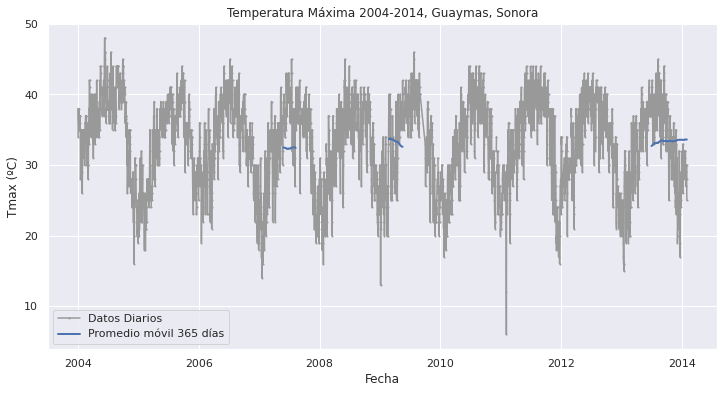

In [104]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2004-01', '2014-01'

# Contraste de la gráfica de datos diarios y promedio móvil de 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_30años.loc[start:end, 'Tmax'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_30años_365d.loc[start:end, 'Tmax'], linestyle='-', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2004-2014, Guaymas, Sonora')
ax.legend();

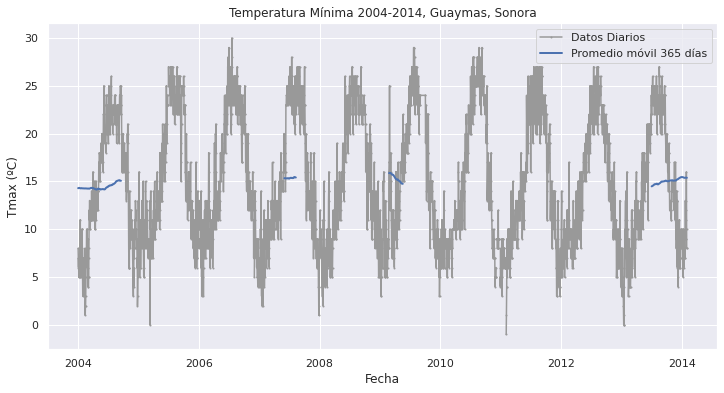

In [105]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2004-01', '2014-01'

# Contraste de la gráfica de datos diarios y promedio móvil de 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_30años.loc[start:end, 'Tmin'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_30años_365d.loc[start:end, 'Tmin'], linestyle='-', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Mínima 2004-2014, Guaymas, Sonora')
ax.legend();

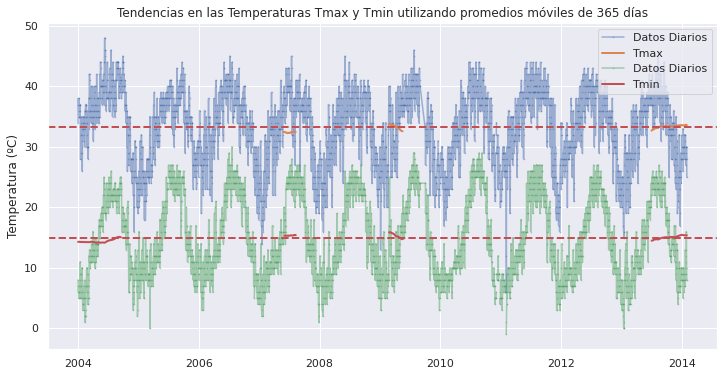

In [106]:
# Graficas de promedios móviles de 365 días para las variables de las Temperaturas  
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '2004-01', '2014-01'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_30años.loc[start:end, nm], marker='.', markersize=1, linestyle='-', alpha=0.5, label='Datos Diarios')
    ax.plot(df_30años_365d.loc[start:end, nm], linewidth=2, label=nm)
    plt.axhline(df_30años.loc[start:end, nm].mean(), color = 'r', linestyle='--', linewidth=2);
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Tendencias en las Temperaturas Tmax y Tmin utilizando promedios móviles de 365 días');

**Actividad 5.** Utiliza la biblioteca _statsmodels.tsa_ de Python, para realizar una descomposición de una serie de tiempo: *Serie Observada = Tendencia + Estacionalidad + Residuo.*

Aplica la función _seasonal_decompose_ para lograr esto, a los datos de Temperaturas Tmax y Tmin, y si tienes datos de Evaporación, selecciona un periodo que haya datos. La función de seasonal_decompose aplica su propio promedio móvil a las series de datos para su análisis.  

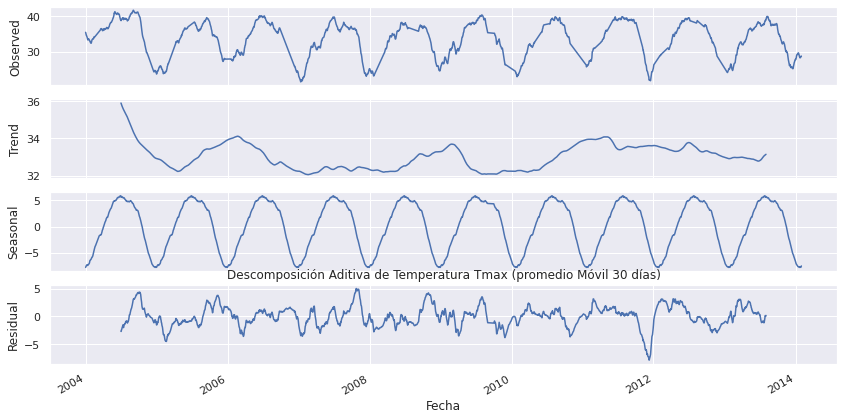

In [116]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2004-01', '2014-01'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_30años_30d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 30 días)');

In [117]:
resTmax.trend.describe()

count    3290.000000
mean       33.028509
std         0.668409
min        32.048082
25%        32.397329
50%        32.988744
75%        33.525333
max        35.907945
Name: Tmax, dtype: float64

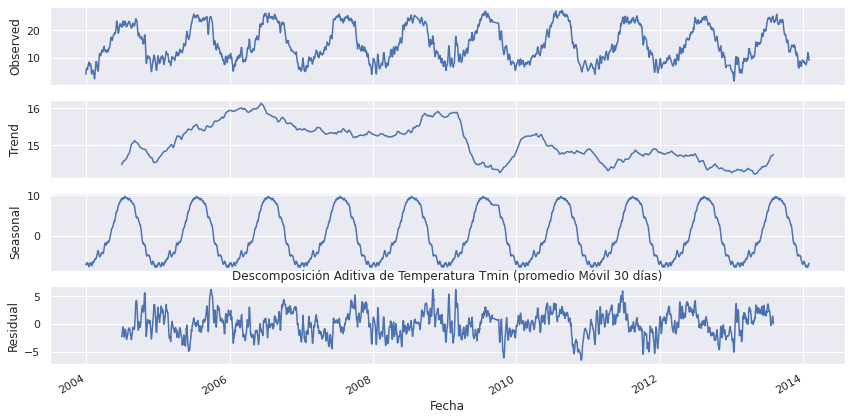

In [118]:
# Caso: Uso de datos con promedio móvil de 7 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' 
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2004-01', '2014-01'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmin = sm.tsa.seasonal_decompose(df_30años_7d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 30 días)');

In [119]:
resTmin.trend.describe()

count    3290.000000
mean       15.080817
std         0.499974
min        14.222896
25%        14.697016
50%        15.062720
75%        15.430479
max        16.131311
Name: Tmin, dtype: float64

**Actividad 6.** Por favor explora visualmente si se observa un cambio en la distribución de Temperaturas (histogramas y kde), sobreponiendo dos histogramas de dos periodos de 30 años contiguos. Utiliza la función de Seaborn: sns.distplot. Agrega una línea vertical punteada indicando el valor del promedio de cada grupo de datos.  

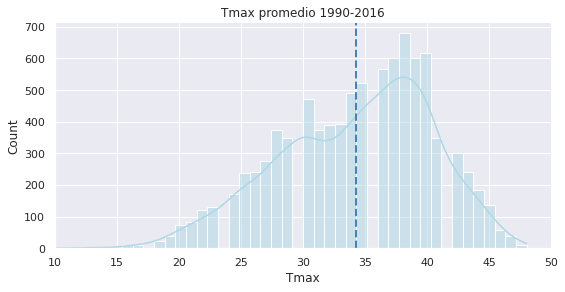

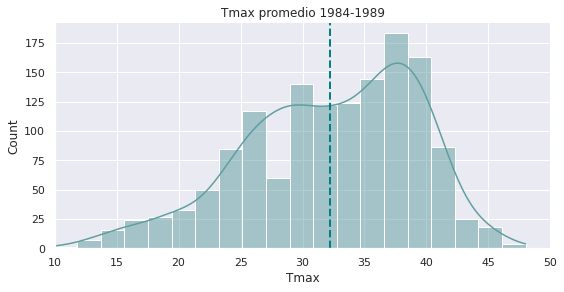

Temperatura máxima promedio del periodo 1990-2016 =  34.23450076136611 ºC
Temperatura máxima promedio del periodo 1984-1986 =  32.24685314685315 ºC


In [122]:
# Gráfica de distribuciones de Temperaturas Tmax 

g1 = sns.displot(df_30años.Tmax, kde=True, color='lightblue', height=4, aspect=2);
plt.axvline(df_30años.Tmax.mean(), linestyle='--', linewidth=2, color='steelblue');

df_primeros = df_meteo_ts[(df_meteo_ts['Año'] < 1990)]
g2 = sns.displot(df_primeros.Tmax, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_primeros.Tmax.mean(), linestyle='--', linewidth=2, color='teal');

g1.set(title='Tmax promedio 1990-2016');
g2.set(title='Tmax promedio 1984-1989');
g1.set(xlim=(10,50))
g2.set(xlim=(10,50))


plt.show();

print('Temperatura máxima promedio del periodo 1990-2016 = ', df_30años.Tmax.mean(), 'ºC' )
print('Temperatura máxima promedio del periodo 1984-1986 = ', df_primeros.Tmax.mean(), 'ºC' )
